<a href="https://colab.research.google.com/github/nannthd/ProjectNNGB/blob/main/model(Nan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#นำเข้าข้อมูล 50 markers

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# สร้างข้อมูล
data = {
    'Marker1': [-0.21475995,-0.24607486,-0.35547295,-0.33942917,-0.36917913,-0.27567565,-0.30029827,-0.19657815,-0.15682828,-0.3763314,-0.20813078,-0.27767688,-0.07345158,-0.018326111,-0.11880783,-0.05770187,-0.12647636,0.04602458,-0.18837385,-0.23522182],
    'Marker2': [-0.24829577,-0.20539336,-0.35560286,-0.30760777,-0.34812567,-0.27463913,-0.25188687,-0.22688274,-0.10341637,-0.2884926,-0.20312509,-0.29722396,-0.023805855,-0.056426838,-0.07859935,-0.01160294,-0.12891445,-0.005515323,-0.12818208,-0.11905009],
    'Marker3': [-0.24106336,-0.2104807,-0.27818972,-0.26166543,-0.36395103,-0.26845706,-0.2638678,-0.10976346,-0.07520539,-0.2769057,-0.16095942,-0.27320644,-0.07010236,-0.079961516,-0.08372416,0.01206838,-0.112008736,0.0016637037,-0.052412182,-0.07761384],
    'Marker4': [-0.21526913,-0.18577021,-0.07161054,-0.17965905,-0.14766793,-0.2619952,-0.11010326,-0.14250363,-0.06310029,-0.10308974,-0.17664298,-0.046209134,-0.067421444,0.13882037,-0.031969916,0.106198244,0.0707554,0.007569751,-0.01044076,0.052665833],
    'Marker5': [-0.095886804,-0.23785539,-0.097828,-0.21902044,-0.14939734,-0.16489327,-0.1125076,-0.051438045,-0.10130325,-0.14099243,-0.10964404,-0.13793397,-0.062084503,0.065042496,-0.037477355,0.027860237,0.09944138,0.09775653,-0.062452693,-0.003320633],
    'Marker6': [-0.3259457,-0.12217542,-0.14067143,-0.16466218,-0.07980277,-0.2723778,-0.13716978,-0.20765702,-0.18912905,-0.28001112,-0.4628733,-0.319234,0.084651686,-0.046996463,0.017541092,-0.08591715,0.08099942,-0.028883878,-0.023130815,-0.08032145],
    'Marker7': [-0.22001062,-0.19670905,-0.0751349,-0.0022647926,-0.09418141,-0.10891589,-0.27687192,-0.25058302,-0.11520121,-0.1971759,-0.25928986,-0.18321407,-0.059385087,-0.07846669,0.060412813,-0.008915015,0.0965496,-0.0129626375,-0.0012567126,0.046431206],
    'Marker8': [-0.10158478,-0.102823734,-0.08402135,-0.12292073,-0.054619845,-0.10582189,-0.10394642,-0.13935165,-0.14210775,-0.14159454,-0.09946353,-0.18115114,0.029322352,0.02677176,-0.031094009,0.053263072,0.038599286,0.15236163,0.023037469,-0.14411348],
    'Marker9': [-0.15921634,-0.15125118,-0.03505474,-0.08043775,-0.09115951,-0.21676897,-0.18617079,-0.16295905,-0.06230989,-0.2534203,-0.1659464,-0.040801812,0.04628173,0.034951974,-0.0365262,0.036796868,0.09662719,0.10324108,0.02242142,-0.052071277],
    'Marker10': [-0.14146677,-0.16509202,-0.14789912,-0.18809235,-0.03846153,-0.23951903,-0.20335098,-0.1889195,-0.03701139,-0.18867078,-0.14694992,-0.18490434,-0.05082847,-0.049552836,-0.005170026,-0.07141527,0.0038826899,0.0028723518,-0.019449748,-0.08798099],
    'Marker11': [-0.35422048,-0.32836953,-0.23416959,-0.27663928,-0.27410877,-0.28105414,-0.46073094,-0.23591219,-0.2680572,-0.34380984,-0.20113942,-0.3824325,-0.16235527,-0.14223555,-0.1708041,-0.18668014,-0.117608435,-0.18090653,-0.11488892,-0.14003897],
    'Marker12': [-0.29656455,-0.24655919,-0.18371125,-0.18981457,-0.20512038,-0.25645483,-0.46279642,-0.14718875,-0.19127023,-0.28870142,-0.21100084,-0.27699474,-0.08484349,-0.066935375,-0.05103655,-0.18772459,-0.09354878,-0.064528115,-0.08742877,-0.0438022],
    'Marker13': [-0.46199417,-0.31278256,-0.39385268,-0.3143589,-0.32397142,-0.35139355,-0.5225161,-0.32350236,-0.445001,-0.5064498,-0.42519376,-0.33903956,-0.23869485,-0.23417844,-0.2104406,-0.17269802,-0.13662688,-0.21647193,-0.33438993,-0.27590525],
    'Marker14': [-0.39494118,-0.2862987,-0.3027908,-0.25083426,-0.2653064,-0.35271567,-0.39042655,-0.23020528,-0.38742673,-0.35945934,-0.29466906,-0.23056427,-0.22818154,-0.17228363,-0.13817415,-0.18221325,-0.11015048,-0.11979661,-0.20889287,-0.24995148],
    'Marker15': [-0.17623463,-0.09314325,-0.03653237,-0.093528055,-0.13145974,-0.16212088,-0.088729925,-0.016310718,-0.07605618,-0.051996186,-0.084157646,-0.08690099,0.10144016,0.022891767,0.040936906,-0.014286051,-0.005264763,0.053323038,-0.010530642,-0.045723774],
    'Marker16': [-0.25455365,-0.046745032,-0.15962437,-0.073721014,-0.15812203,-0.19611286,-0.20015131,-0.074641876,-0.14511308,-0.24553138,-0.21586,-0.10541959,0.15395316,-0.029738601,0.028698443,-0.02880178,-0.06388806,0.16090694,-0.0014480375,-0.045145225],
    'Marker17': [-0.20720959,-0.20465991,-0.17440371,-0.08421124,-0.26064473,-0.17034204,-0.32178888,-0.1641772,-0.23110472,-0.181774,-0.22917628,-0.18461655,-0.110607564,-0.05488845,-0.0806586,-0.11509229,-0.1285272,0.01992369,-0.05325482,-0.0915509],
    'Marker18': [-0.21752828,-0.35649985,-0.25175354,-0.31256065,-0.41348505,-0.17246872,-0.40677655,-0.2578961,-0.34119296,-0.44284955,-0.38577646,-0.23053145,-0.16391492,-0.2201239,-0.1146318,-0.09928881,-0.16349635,-0.017243126,-0.17121601,-0.16349341],
    'Marker19': [-0.26080704,0.04253943,-0.13144569,-0.043721117,-0.34060428,-0.22644344,-0.34352896,-0.31494254,-0.24539195,-0.41620728,-0.25368991,-0.06543027,0.13551922,0.123672344,-0.10557641,0.010543567,0.05003433,0.18325076,0.07584235,0.2590662],
    'Marker20': [-0.14887547,-0.10720442,-0.06881018,-0.15858823,-0.15761626,-0.12747914,-0.15398382,-0.08359529,-0.12128892,-0.11779294,-0.124919906,-0.069543205,-0.015435997,0.02205151,-0.0010755485,-0.03291033,0.012753551,8.73E-04,0.029991962,0.070913434],
    'Marker21': [-0.17852098,-0.08607066,-0.028067298,-0.08481694,-0.1788753,-0.1334578,-0.16657616,-0.035724442,-0.13181405,-0.10946055,-0.12681305,-0.056246005,0.0020563,-0.0028633766,0.015256895,-0.014178008,0.043791287,0.030483678,-0.038436588,0.06068968],
    'Marker22': [0.03617472,0.02620889,0.013769598,0.089527406,-0.0012456145,0.05363568,0.12266984,0.08187162,-0.0073724706,-0.021652745,0.042040635,0.0037896663,-0.08696151,-0.1217463,-0.06664544,-0.048359044,-0.04427205,-0.019145925,-0.02865962,-0.13473032],
    'Marker23': [0.09773507,0.1607875,0.13182351,0.19551614,0.072503835,0.25934076,0.21451981,0.17459962,0.21489234,0.26537687,0.07673971,0.23432595,-0.037869375,0.073089905,0.0457453,0.069803536,-0.046119813,0.05159225,0.086458914,-8.08E-04],
    'Marker24': [0.09849964,0.113588974,0.07446963,0.20752268,0.0781568,0.2273544,0.23204857,0.24611205,0.2230756,0.27922723,0.099587485,0.18324462,-0.039340556,0.04488993,-0.020957723,0.010360887,0.038692668,-0.047526486,0.011411094,-0.108723134],
    'Marker25': [0.10549464,0.13394517,0.07651371,0.1422526,0.09882089,0.1954132,0.22121394,0.20763317,0.1784774,0.17719845,-0.009071062,0.1344935,-0.06175572,-0.0567218,-0.029527333,-0.022710532,-0.013533709,-0.12512858,0.09748172,-0.1880517],
    'Marker26': [0.14056122,0.1039904,0.12071164,0.05861343,0.1311989,0.23426838,0.22118552,0.08230702,0.100664146,0.21075328,0.17422736,0.16337001,1.57E-04,0.016108295,0.022059195,0.016045604,-0.004535653,-0.04554186,-0.017441818,-0.0032582497],
    'Marker27': [0.36068624,0.33732137,0.24745347,0.27368304,0.26657826,0.49682075,0.4530719,0.335507,0.24646033,0.43433133,0.4644007,0.32749486,0.050172977,0.19858798,0.1508114,0.10715213,0.220166,0.115967,0.27349702,0.21353087],
    'Marker28': [0.02484217,0.04209147,0.042637408,0.15575516,0.08324107,0.13563944,0.14290808,0.008499985,0.0030448104,0.14858358,0.10417821,0.07812818,-0.12626283,-0.10115842,-0.080085866,-0.035265084,-0.018220432,-0.062272847,0.053958032,-0.09597243],
    'Marker29': [0.05323617,0.11853301,0.101444125,0.1857919,0.072588846,0.20125885,0.24896777,0.08579636,0.18567203,0.24343778,0.15976,0.14067347,-0.11301466,-0.029836215,0.060838617,-0.02593658,0.06570361,-0.110268414,0.015380934,0.036293983],
    'Marker30': [0.18974796,0.10463281,0.14380328,0.096505076,0.034233887,0.17585029,0.23878896,0.15669231,0.15753952,0.35008496,0.20809676,0.20759158,-0.09209713,-0.057462208,-0.08969938,-0.020729883,0.07506497,-0.1531994,0.12824258,0.045299828],
    'Marker31': [0.1813611,0.051654454,0.13725123,0.19351715,0.19443554,0.24043342,-0.024553943,0.18154234,0.20493795,0.22765315,0.12642078,0.19451898,0.10179886,-0.09073631,0.023413518,-0.0031696716,0.05041202,-0.09962593,-0.06992875,-0.06630465],
    'Marker32': [0.124310285,-0.05206808,-0.05073664,0.0023496097,0.1389062,0.16481896,0.04624959,0.075282,0.17961447,0.22733782,0.10790395,0.08722614,-0.0640619,-0.14601968,-0.15003058,-0.077780396,-0.18722442,-0.11786794,0.041509107,-0.08672734],
    'Marker33': [0.11890717,0.06399082,0.18736723,0.12241166,0.16446435,0.23906311,0.18385646,0.18614952,0.21349777,0.32965213,0.19401881,0.14833294,-0.030647185,0.048143342,-0.05207609,-0.04185023,0.0572862,0.07493453,0.12983981,0.05358717],
    'Marker34': [0.13286176,0.07971229,0.13373482,0.05289639,0.0454524,0.0817747,0.05952619,0.12001246,0.06642882,-0.046684623,0.06683687,0.2000253,-0.07827082,-0.13667393,-0.12632006,-0.057360537,0.0072893095,-0.2721105,-0.015247066,-0.074733675],
    'Marker35': [0.26170063,0.27658156,0.20578116,0.13892514,0.27991375,0.11482341,0.14690171,0.24812974,0.34798706,0.08357806,0.2436189,0.24721311,-0.11181696,-0.049201712,0.021952922,-0.03121084,-0.06576854,-0.3136492,0.1483898,0.06952403],
    'Marker36': [0.23998505,0.22390209,0.25561634,0.16650066,0.21471155,0.046330787,0.09720087,0.13488078,0.23563902,-0.019393168,0.19943,0.17778729,-0.073976226,-0.07672036,0.0036493088,-0.051322356,-0.06548151,-0.23942122,0.10441337,0.048743807],
    'Marker37': [0.29450485,0.071275905,0.08672022,0.16545889,0.23007695,0.03755735,0.2962365,0.25032538,0.18718925,0.25100356,0.062179405,0.36453292,-0.005429778,-0.09166494,0.0041526826,-0.001336557,-0.03458734,-0.017471796,0.022184461,-0.22408588],
    'Marker38': [0.3704865,0.11621879,0.0706054,0.19190499,0.21402939,0.06552462,0.2652474,0.16520083,0.10624216,0.22074726,0.006472536,0.21944763,-0.016727293,-0.08919239,-0.030697271,0.0060132835,-0.019231854,-0.07922143,0.014396044,-0.18298435],
    'Marker39': [0.27646747,0.085846916,0.062415384,0.13902146,0.20316063,0.008922122,0.24999866,0.20426176,0.11285363,0.26009852,-0.0103663895,0.23173296,-0.070881054,-0.1434686,-0.031543605,-0.03191607,-0.01859284,-0.104349114,0.044273533,-0.09398791],
    'Marker40': [0.41798463,0.24641871,0.29129252,0.27456394,0.3278035,0.27294356,0.44663182,0.5226502,0.26541916,0.40748885,0.26461443,0.43080598,0.14205058,0.26778337,0.17040028,0.07991891,0.18434101,0.16332214,0.18834569,0.043462776],
    'Marker41': [0.14937885,-0.0048829424,-0.12232843,0.030238945,0.07607952,5.34E-04,0.0798081,0.26665044,-0.12922108,0.11590231,0.08572811,0.022159895,-0.06341852,-0.23539482,-0.16247058,-0.16708978,-0.17473009,-0.25122896,-0.08091093,-0.23048554],
    'Marker42': [0.103906065,0.003642245,-0.05205266,0.12769957,0.14536755,0.20649001,0.16701499,0.06582616,0.024835473,0.07233325,0.018827386,0.056882262,-0.0871389,-0.021706514,-0.081826575,0.010802814,-0.058228437,-0.18326761,-0.20451169,-0.11008011],
    'Marker43': [0.1522005,0.02337844,0.0266399,0.08468859,0.06702682,0.099458486,0.18774186,0.10115626,0.12692039,0.16118962,0.14544243,0.1423656,-0.027491935,0.041756716,0.02681363,-0.052386746,-0.03114359,0.032561883,-0.08613895,0.019236054],
    'Marker44': [0.20286426,0.104939766,0.13240016,0.18291779,0.29108804,0.11514044,0.1790594,0.14991392,0.20125525,0.21061632,0.18347338,0.07538044,-0.024954056,0.13754815,0.061886955,-0.12622458,0.06476687,-0.09265184,-0.10410779,0.07000702],
    'Marker45': [0.2966317,0.12732084,0.08998669,0.114344634,0.13758472,0.095355675,0.28365266,0.12116422,0.11720613,0.11794605,0.12801982,0.18469001,0.049221125,0.01777271,-0.04476168,0.034632906,-0.009264791,-0.013666006,-0.071112506,0.07594667],
    'Marker46': [0.34797895,0.1562836,0.2212102,0.19487125,0.19284871,0.2288642,0.31428614,0.19328296,0.2355901,0.23336098,0.18214162,0.28597498,0.13029024,0.065120205,-0.053092033,0.15747544,0.12891546,-0.025262963,0.07153229,0.15775879],
    'Marker47': [0.1656223,-0.009942351,0.0063725556,0.031368036,-0.0045858673,0.100804046,0.15526663,0.10976615,0.07525066,0.14800423,0.017106,0.05417184,-0.0141690215,-0.12864235,-0.20713657,-0.022981988,-0.0098168785,-0.17636277,-0.18541431,-0.025629746],
    'Marker48': [0.04399506,0.02664466,-0.009284257,-0.10780214,-0.0026726862,0.027599458,0.054087095,-0.063832656,0.0964789,-0.025661243,-0.025716998,0.0326126,-0.12269841,-0.1344479,-0.11542089,-0.04984091,-0.09751576,-0.11254053,-0.12421852,-0.0810039],
    'Marker49': [0.09414151,0.13652676,0.106032945,0.09461703,0.16141382,0.17439671,0.31455922,0.31480375,0.14051712,0.22578697,0.12786983,0.14298986,-0.102387354,-0.034118745,0.06777463,0.018704083,0.008516751,-0.047604688,-0.008364186,0.06330953],
    'Marker50': [0.11358154,0.15820965,0.03174097,0.023324464,0.0934095,0.100686535,0.22144164,0.09071201,0.1409559,0.12793596,0.06139533,0.051768392,-0.12819903,-0.105145186,-0.094596334,-0.014817486,0.01475631,-0.15137003,-0.0488976,0.10366625],
'Label': [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
}

df = pd.DataFrame(data)

In [31]:
df

,Marker1,Marker2,Marker3,Marker4,Marker5,Marker6,Marker7,Marker8,Marker9,Marker10,...,Marker42,Marker43,Marker44,Marker45,Marker46,Marker47,Marker48,Marker49,Marker50,Label
0,-0.214760,-0.248296,-0.241063,-0.215269,-0.095887,-0.325946,-0.220011,-0.101585,-0.159216,-0.141467,...,0.103906,0.152200,0.202864,0.296632,0.347979,0.165622,0.043995,0.094142,0.113582,0
1,-0.246075,-0.205393,-0.210481,-0.185770,-0.237855,-0.122175,-0.196709,-0.102824,-0.151251,-0.165092,...,0.003642,0.023378,0.104940,0.127321,0.156284,-0.009942,0.026645,0.136527,0.158210,0
2,-0.355473,-0.355603,-0.278190,-0.071611,-0.097828,-0.140671,-0.075135,-0.084021,-0.035055,-0.147899,...,-0.052053,0.026640,0.132400,0.089987,0.221210,0.006373,-0.009284,0.106033,0.031741,0
3,-0.339429,-0.307608,-0.261665,-0.179659,-0.219020,-0.164662,-0.002265,-0.122921,-0.080438,-0.188092,...,0.127700,0.084689,0.182918,0.114345,0.194871,0.031368,-0.107802,0.094617,0.023324,0
4,-0.369179,-0.348126,-0.363951,-0.147668,-0.149397,-0.079803,-0.094181,-0.054620,-0.091160,-0.038462,...,0.145368,0.067027,0.291088,0.137585,0.192849,-0.004586,-0.002673,0.161414,0.093410,0
5,-0.275676,-0.274639,-0.268457,-0.261995,-0.164893,-0.272378,-0.108916,-0.105822,-0.216769,-0.239519,...,0.206490,0.099458,0.115140,0.095356,0.228864,0.100804,0.027599,0.174397,0.100687,0
6,-0.300298,-0.251887,-0.263868,-0.110103,-0.112508,-0.137170,-0.276872,-0.103946,-0.186171,-0.203351,...,0.167015,0.187742,0.179059,0.283653,0.314286,0.155267,0.054087,0.314559,0.221442,0
7,-0.196578,-0.226883,-0.109763,-0.142504,-0.051438,-0.207657,-0.250583,-0.139352,-0.162959,-0.188919,...,0.065826,0.101156,0.149914,0.121164,0.193283,0.109766,-0.063833,0.314804,0.090712,0
8,-0.156828,-0.103416,-0.075205,-0.063100,-0.101303,-0.189129,-0.115201,-0.142108,-0.062310,-0.037011,...,0.024835,0.126920,0.201255,0.117206,0.235590,0.075251,0.096479,0.140517,0.140956,0
9,-0.376331,-0.288493,-0.276906,-0.103090,-0.140992,-0.280011,-0.197176,-0.141595,-0.253420,-0.188671,...,0.072333,0.161190,0.210616,0.117946,0.233361,0.148004,-0.025661,0.225787,0.127936,0


#กำหนดค่าโมเดล

In [32]:
# กำหนด random seed
random_seed = 42

# สุ่มข้อมูลเพื่อทำการแบ่ง train/test set
train_data, test_data = train_test_split(df, test_size=0.2, random_state=random_seed)

# กำหนด random seed ใน RandomForestClassifier
model = RandomForestClassifier(random_state=random_seed)

In [33]:
train_data

,Marker1,Marker2,Marker3,Marker4,Marker5,Marker6,Marker7,Marker8,Marker9,Marker10,...,Marker42,Marker43,Marker44,Marker45,Marker46,Marker47,Marker48,Marker49,Marker50,Label
8,-0.156828,-0.103416,-0.075205,-0.063100,-0.101303,-0.189129,-0.115201,-0.142108,-0.062310,-0.037011,...,0.024835,0.126920,0.201255,0.117206,0.235590,0.075251,0.096479,0.140517,0.140956,0
5,-0.275676,-0.274639,-0.268457,-0.261995,-0.164893,-0.272378,-0.108916,-0.105822,-0.216769,-0.239519,...,0.206490,0.099458,0.115140,0.095356,0.228864,0.100804,0.027599,0.174397,0.100687,0
11,-0.277677,-0.297224,-0.273206,-0.046209,-0.137934,-0.319234,-0.183214,-0.181151,-0.040802,-0.184904,...,0.056882,0.142366,0.075380,0.184690,0.285975,0.054172,0.032613,0.142990,0.051768,0
3,-0.339429,-0.307608,-0.261665,-0.179659,-0.219020,-0.164662,-0.002265,-0.122921,-0.080438,-0.188092,...,0.127700,0.084689,0.182918,0.114345,0.194871,0.031368,-0.107802,0.094617,0.023324,0
18,-0.188374,-0.128182,-0.052412,-0.010441,-0.062453,-0.023131,-0.001257,0.023037,0.022421,-0.019450,...,-0.204512,-0.086139,-0.104108,-0.071113,0.071532,-0.185414,-0.124219,-0.008364,-0.048898,1
16,-0.126476,-0.128914,-0.112009,0.070755,0.099441,0.080999,0.096550,0.038599,0.096627,0.003883,...,-0.058228,-0.031144,0.064767,-0.009265,0.128915,-0.009817,-0.097516,0.008517,0.014756,1
13,-0.018326,-0.056427,-0.079962,0.138820,0.065042,-0.046996,-0.078467,0.026772,0.034952,-0.049553,...,-0.021707,0.041757,0.137548,0.017773,0.065120,-0.128642,-0.134448,-0.034119,-0.105145,1
2,-0.355473,-0.355603,-0.278190,-0.071611,-0.097828,-0.140671,-0.075135,-0.084021,-0.035055,-0.147899,...,-0.052053,0.026640,0.132400,0.089987,0.221210,0.006373,-0.009284,0.106033,0.031741,0
9,-0.376331,-0.288493,-0.276906,-0.103090,-0.140992,-0.280011,-0.197176,-0.141595,-0.253420,-0.188671,...,0.072333,0.161190,0.210616,0.117946,0.233361,0.148004,-0.025661,0.225787,0.127936,0
19,-0.235222,-0.119050,-0.077614,0.052666,-0.003321,-0.080321,0.046431,-0.144113,-0.052071,-0.087981,...,-0.110080,0.019236,0.070007,0.075947,0.157759,-0.025630,-0.081004,0.063310,0.103666,1


In [ ]:
test_data

In [40]:
# ทำการ train แบบจำลอง
X_train = train_data.drop('Label', axis=1)
y_train = train_data['Label']
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# ทำการ test แบบจำลอง
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']
accuracy = model.score(X_test, y_test)

print(f'Accuracy: {accuracy}')

Accuracy: 1.0


#feature importance

In [4]:
# ดูค่า feature importance
feature_importance = model.feature_importances_

# แสดงผลลัพธ์
for i, importance in enumerate(feature_importance):
    print(f"Marker {i+1}: {importance}")

Marker 1: 0.0
Marker 2: 0.037575757575757575
Marker 3: 0.01
Marker 4: 0.02
Marker 5: 0.02
Marker 6: 0.03
Marker 7: 0.01
Marker 8: 0.01
Marker 9: 0.01
Marker 10: 0.0
Marker 11: 0.03
Marker 12: 0.01
Marker 13: 0.0024242424242424242
Marker 14: 0.02
Marker 15: 0.0
Marker 16: 0.06
Marker 17: 0.02
Marker 18: 0.01
Marker 19: 0.02
Marker 20: 0.04
Marker 21: 0.02
Marker 22: 0.01
Marker 23: 0.0
Marker 24: 0.06
Marker 25: 0.02
Marker 26: 0.02
Marker 27: 0.05
Marker 28: 0.04
Marker 29: 0.04
Marker 30: 0.02
Marker 31: 0.0
Marker 32: 0.01
Marker 33: 0.0
Marker 34: 0.0
Marker 35: 0.01
Marker 36: 0.0
Marker 37: 0.03
Marker 38: 0.03
Marker 39: 0.0
Marker 40: 0.02
Marker 41: 0.03
Marker 42: 0.03
Marker 43: 0.03
Marker 44: 0.0
Marker 45: 0.04
Marker 46: 0.04
Marker 47: 0.02
Marker 48: 0.01
Marker 49: 0.03
Marker 50: 0.03


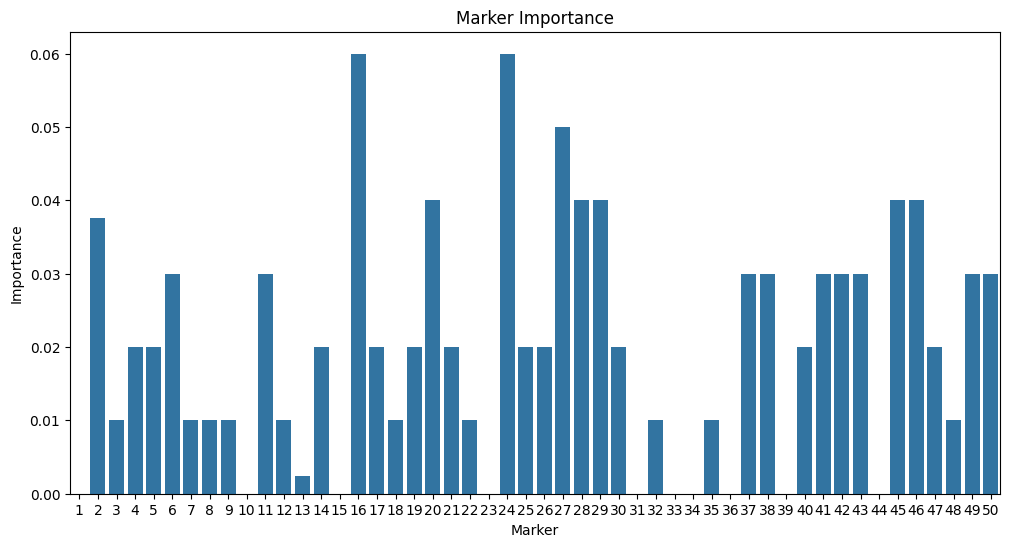

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame จากข้อมูล
importance_df = pd.DataFrame({'Marker': range(1, len(feature_importance)+1), 'Importance': feature_importance})

# สร้างกราฟ
plt.figure(figsize=(12, 6))
sns.barplot(x='Marker', y='Importance', data=importance_df)
plt.title('Marker Importance')
plt.xlabel('Marker')
plt.ylabel('Importance')
plt.show()

<ipython-input-61-33d954a58c7a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marker', y='Importance', data=importance_df, palette=colors)


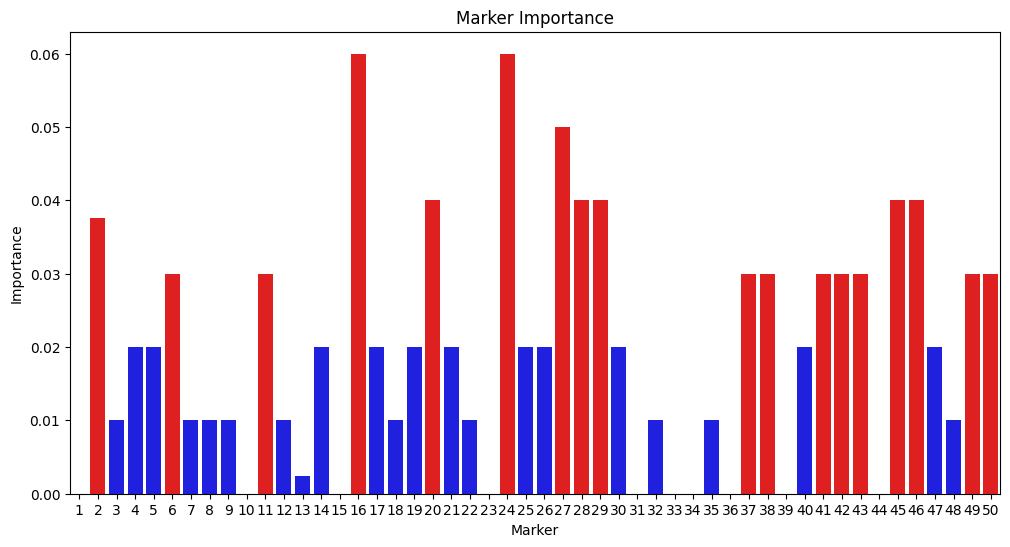

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้างกราฟ
plt.figure(figsize=(12, 6))

# กำหนดสีแดงสำหรับค่าที่สูง 10 ค่า
colors = ['red' if importance >= importance_df['Importance'].nlargest(10).min() else 'blue' for importance in importance_df['Importance']]

# ใช้ seaborn.barplot เพื่อสร้างกราฟแท่ง
sns.barplot(x='Marker', y='Importance', data=importance_df, palette=colors)

# กำหนดหัวข้อและแกน
plt.title('Marker Importance')
plt.xlabel('Marker')
plt.ylabel('Importance')

# แสดงกราฟ
plt.show()

##top 10 feature importance

In [6]:
# จัดเรียงลำดับค่า feature importance
sorted_indices = feature_importance.argsort()[::-1]

# แสดงผลลัพธ์สำหรับ 10 ค่าที่สูงที่สุด
top_10_indices = sorted_indices[:10]

for i in top_10_indices:
    print(f"Marker {i+1}: {feature_importance[i]}")

Marker 24: 0.06
Marker 16: 0.06
Marker 27: 0.05
Marker 28: 0.04
Marker 46: 0.04
Marker 45: 0.04
Marker 29: 0.04
Marker 20: 0.04
Marker 2: 0.037575757575757575
Marker 49: 0.03


#เอาtop10 มาสร้างโมเดลใหม่

In [7]:
# เลือก 10 Markers ที่สำคัญที่สุด
selected_markers = ['Marker24', 'Marker16', 'Marker27', 'Marker28', 'Marker46', 'Marker45', 'Marker29', 'Marker20', 'Marker2', 'Marker49']

In [8]:
# สร้าง Dataset ใหม่
selected_data = df.loc[:, selected_markers]
selected_data.loc[:, 'Label'] = df['Label'].copy()

In [44]:
# แบ่ง Train/Test Set
train_data, test_data = train_test_split(selected_data, test_size=0.2, random_state=42)

In [10]:
# Train โมเดล
X_train = train_data.drop('Label', axis=1)
y_train = train_data['Label']
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
test_data

,Marker24,Marker16,Marker27,Marker28,Marker46,Marker45,Marker29,Marker20,Marker2,Marker49,Label
0,0.098500,-0.254554,0.360686,0.024842,0.347979,0.296632,0.053236,-0.148875,-0.248296,0.094142,0
17,-0.047526,0.160907,0.115967,-0.062273,-0.025263,-0.013666,-0.110268,0.000873,-0.005515,-0.047605,1
15,0.010361,-0.028802,0.107152,-0.035265,0.157475,0.034633,-0.025937,-0.032910,-0.011603,0.018704,1
1,0.113589,-0.046745,0.337321,0.042091,0.156284,0.127321,0.118533,-0.107204,-0.205393,0.136527,0


In [12]:
# ทดสอบโมเดล
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']
accuracy = model.score(X_test, y_test)

print(f'Accuracy: {accuracy}')


Accuracy: 1.0


#โมเดลทำนาย

In [13]:
selected_data

,Marker24,Marker16,Marker27,Marker28,Marker46,Marker45,Marker29,Marker20,Marker2,Marker49,Label
0,0.098500,-0.254554,0.360686,0.024842,0.347979,0.296632,0.053236,-0.148875,-0.248296,0.094142,0
1,0.113589,-0.046745,0.337321,0.042091,0.156284,0.127321,0.118533,-0.107204,-0.205393,0.136527,0
2,0.074470,-0.159624,0.247453,0.042637,0.221210,0.089987,0.101444,-0.068810,-0.355603,0.106033,0
3,0.207523,-0.073721,0.273683,0.155755,0.194871,0.114345,0.185792,-0.158588,-0.307608,0.094617,0
4,0.078157,-0.158122,0.266578,0.083241,0.192849,0.137585,0.072589,-0.157616,-0.348126,0.161414,0
5,0.227354,-0.196113,0.496821,0.135639,0.228864,0.095356,0.201259,-0.127479,-0.274639,0.174397,0
6,0.232049,-0.200151,0.453072,0.142908,0.314286,0.283653,0.248968,-0.153984,-0.251887,0.314559,0
7,0.246112,-0.074642,0.335507,0.008500,0.193283,0.121164,0.085796,-0.083595,-0.226883,0.314804,0
8,0.223076,-0.145113,0.246460,0.003045,0.235590,0.117206,0.185672,-0.121289,-0.103416,0.140517,0
9,0.279227,-0.245531,0.434331,0.148584,0.233361,0.117946,0.243438,-0.117793,-0.288493,0.225787,0


##ดื้อยา

###0

In [14]:
#ข้อมูลที่ใช้ทำนาย
import numpy as np
new_data = [0.098500, -0.254554, 0.360686, 0.024842, 0.347979, 0.296632, 0.053236, -0.148875, -0.248296, 0.094142]
new_data = np.array(new_data).reshape(1, -1)  # แปลงเป็น array และ reshape เพื่อให้เป็น 2D array

# ทำนาย
prediction = model.predict(new_data)

# แปลผล
for pred in prediction:
    if pred == 0:
        print("ดื้อยา")
    else:
        print("ไม่ดื้อยา")


ดื้อยา


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###1

In [15]:
#ข้อมูลที่ใช้ทำนาย
import numpy as np
new_data = [0.113589,	-0.046745,	0.337321,	0.042091,	0.156284,	0.127321,	0.118533,	-0.107204,	-0.205393,	0.136527]
new_data = np.array(new_data).reshape(1, -1)  # แปลงเป็น array และ reshape เพื่อให้เป็น 2D array

# ทำนาย
prediction = model.predict(new_data)

# แปลผล
for pred in prediction:
    if pred == 0:
        print("ดื้อยา")
    else:
        print("ไม่ดื้อยา")

ดื้อยา


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##ไม่ดื้อยา

###15

In [16]:
#ข้อมูลที่ใช้ทำนาย
import numpy as np
new_data = [0.010361,	-0.028802,	0.107152,	-0.035265,	0.157475,	0.034633,	-0.025937,	-0.032910,	-0.011603,	0.018704	]
new_data = np.array(new_data).reshape(1, -1)  # แปลงเป็น array และ reshape เพื่อให้เป็น 2D array

# ทำนาย
prediction = model.predict(new_data)

# แปลผล
for pred in prediction:
    if pred == 0:
        print("ดื้อยา")
    else:
        print("ไม่ดื้อยา")

ไม่ดื้อยา


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###17

In [17]:
#ข้อมูลที่ใช้ทำนาย
import numpy as np
new_data = [-0.047526,	0.160907,	0.115967,	-0.062273,	-0.025263,	-0.013666,	-0.110268,	0.000873,	-0.005515,	-0.047605]
new_data = np.array(new_data).reshape(1, -1)  # แปลงเป็น array และ reshape เพื่อให้เป็น 2D array

# ทำนาย
prediction = model.predict(new_data)

# แปลผล
for pred in prediction:
    if pred == 0:
        print("ดื้อยา")
    else:
        print("ไม่ดื้อยา")

ไม่ดื้อยา


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 4 markers

In [55]:
# เลือก 4 Markers
selected_markers2 = ['Marker46', 'Marker27', 'Marker2', 'Marker49']
selected_markers2

['Marker46', 'Marker27', 'Marker2', 'Marker49']

In [56]:
# สร้าง Dataset ใหม่
selected_data2 = df.loc[:, selected_markers2]
selected_data2.loc[:, 'Label'] = df['Label'].copy()

In [57]:
# แบ่ง Train/Test Set
train_data, test_data = train_test_split(selected_data2, test_size=0.2, random_state=42)

In [58]:
# Train โมเดล
X_train = train_data.drop('Label', axis=1)
y_train = train_data['Label']
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
test_data

,Marker46,Marker27,Marker2,Marker49,Label
0,0.347979,0.360686,-0.248296,0.094142,0
17,-0.025263,0.115967,-0.005515,-0.047605,1
15,0.157475,0.107152,-0.011603,0.018704,1
1,0.156284,0.337321,-0.205393,0.136527,0


In [60]:
# ทดสอบโมเดล
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']
accuracy = model.score(X_test, y_test)

print(f'Accuracy: {accuracy}')


Accuracy: 1.0


#เอาโมเดลออกมาใช้งาน

In [ ]:
import joblib

# บันทึกโมเดล
joblib.dump(model, 'drug_resistance_model.joblib')

# โหลดโมเดล
loaded_model = joblib.load('drug_resistance_model.joblib')